In [11]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from yoda.alignments import load_rfam
from yoda import graphs as ygraphs

import cmcomp
import matplotlib as mpl
mpl.rc("figure", dpi=100)

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
a,l = load_rfam(full= False, add_cov= False)

# CMCOMPARE

In [13]:

data = {}
runtime = {}
# THIS IS HOW WE WOULD RERUN THE CALCULATION
# names = [aa.gf["AC"][3:] for aa in a]
# [cmcomp.dumpcm(name) for name in names]
# IMPORTANTRESULT = cmcomp.run_cmcompare_pairwise()
# IMPORTANTRESULT.to_csv('cmcompare_full_run')

# LOAD CMCOMP DATA
data['CMCompare'] = cmcomp.loadcmcomp('cmcompare_full_run_2024_06_27')
runtime['CMCompare'] = f"12h"



# KRAID


In [4]:
import time
start = time.time()
matrix = ygraphs.alignment_to_vectors(a)



'''
def mkdf(mat):
    sim = mat @ mat.T
    # sim = -euclidean_distances(mat)
    data = [{'cm1':a, 'cm2':b , 'score1': sim[a,b]} for a in Range(l) for b in Range(l)]
    return pd.DataFrame(data)
#yoda_data = mkdf(matrix)
#yoda_dist = cmcomp.to_dist(cmcomp.pivot_numpy(yoda_data))
'''

from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
ourmethod = 'KRAID'
data[ourmethod] = cosine_distances(matrix)
runtime[ourmethod] = f"{time.time() - start:.2}s"


In [5]:
# one could do it like this:
# a,l = load_rfam(full= False, add_cov= False)
# graphs = lmz.Map(ali2graph.writecons, a)
#eden_sim = ygraphs.vectorize_graphs(graphs, normalization=True, min_r = 2,min_d=1, inner_normalization=True)
# data['NSPDK'] = mkdist(eden_sim)
start = time.time()
data['NSPDK'] = cosine_distances(ygraphs.vectorize_graphs([alignment.graph for alignment in a]))

runtime['NSPDK'] = f"{time.time() - start:.2}s"


# INFERNAL

In [6]:

data['Infernal']=cmcomp.infernal_tbl_to_dist(a,l,'inftools/infernal.tbl')
data['Infernal_global']=cmcomp.infernal_tbl_to_dist(a,l,'inftools/infernal_global.tbl')

runtime['Infernal'] = '904 s'
runtime['Infernal_global'] = '846 s'




# clan discovery

In [7]:
randomarray = np.random.rand(395,395)
np.fill_diagonal(randomarray, 0)
data['random']= randomarray
runtime['random'] = 'n/a'

In [8]:
# k clans plot
# we also need to collect the results for the other normed methods -> 3 x 2 lines are in this plot
figpath =  !echo $HOME/pigplot/
figpath = figpath[0]
figpath

'/home/ubuntu/pigplot/'

In [9]:
#sns.reset_defaults()
# FULL PLOT

# z = sns.color_palette("muted")
# huemap = dict(zip(np.unique(df.Method),z.as_hex()))
# print(huemap)

#sns.reset_defaults()
# REDUCED PLOT


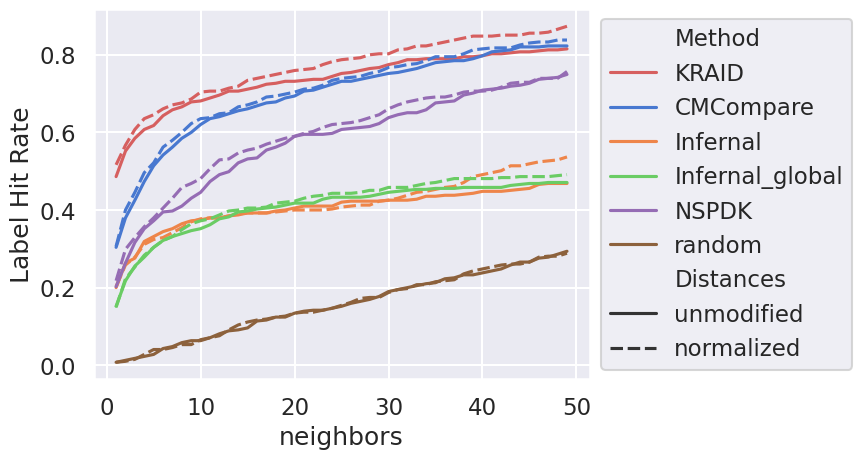

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/pigplot/350hitrate_full.png'

In [10]:

df_hit = cmcomp.mkHitRateData(data,l)

ax = cmcomp.plot_hitrate_plusCSLS(df_hit)
ax.get_figure().savefig(figpath + '350hitrate_full.png' ,  bbox_inches='tight')
ax = cmcomp.plot_hitrate_noCSLS(df_hit)
ax.get_figure().savefig(figpath + '350hitrate.png',bbox_inches='tight')



In [ ]:
import numpy as np
from yoda.ml import nearneigh

# Example usage (assuming 'data' is defined and 'l' contains the labels)
results = cmcomp.collect_results_precrec(data, l)#%%


In [ ]:
import pandas as pd

# Constant for the plot title


# Original dataframe creation and full-data plot
df = pd.DataFrame(results)
ax = cmcomp.plot_precision_recall_curve(df, style_column='Distances')
ax.get_figure().savefig(figpath + '350precrec_full.png', bbox_inches='tight')

# Filtering the dataframe and plotting filtered data
filtered_df = df[(df['Distances'] == 'Normalized') & (df['Method'] != 'Infernal_global')]
ax = cmcomp.plot_precision_recall_curve(filtered_df)

ax.get_figure().savefig(figpath + '350precrec.png', bbox_inches='tight')


In [ ]:
fig = cmcomp.slobplot(df_hit,df)
fig.savefig(figpath + '350eval.png', bbox_inches='tight')

In [ ]:
df2 = cmcomp.make_results_table(data,l, runtime)
print(df2.to_latex(index=True,  header=True, float_format="%.2f"))

df2